In [7]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict, Annotated
from langgraph.types import Send
import operator

In [8]:
from typing import Union


class State(TypedDict):
    words: list[str]
    output: Annotated[list[dict[str, Union[str, int]]], operator.add]


graph_builder = StateGraph(State)

In [9]:
def node_one(state: State) -> State:
    print(f"I want to count {len(state['words'])} words in my state.")


def node_two(word: str) -> dict[str, Union[str, int]]:
    count = len(word)
    return {
        "output": [
            {
                "word": word,
                "letters": count,
            }
        ]
    }


In [10]:
graph_builder.add_node("node_one", node_one)
graph_builder.add_node("node_two", node_two)


def dispatcher(state: State) -> list[str]:
    return [Send("node_two", word) for word in state["words"]]


graph_builder.add_edge(START, "node_one")
graph_builder.add_conditional_edges("node_one", dispatcher, ["node_two"])
graph_builder.add_edge("node_two", END)


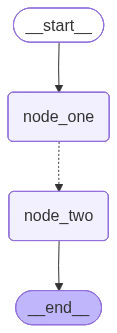

In [11]:
graph = graph_builder.compile()

graph


In [12]:
result = graph.invoke({"words": ["Hello", "world", "how", "are", "you"]})

print("result", result)


I want to count 5 words in my state.
result {'words': ['Hello', 'world', 'how', 'are', 'you'], 'output': [{'word': 'Hello', 'letters': 5}, {'word': 'world', 'letters': 5}, {'word': 'how', 'letters': 3}, {'word': 'are', 'letters': 3}, {'word': 'you', 'letters': 3}]}
